In [4]:
!pip install numpy 

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [8]:
from datetime import date

In [9]:
import pandas_datareader as pdr

C:\Users\nuham\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [10]:
import matplotlib.pyplot as plt 

In [11]:

start = date(2019, 9, 10 ) #from sep 13 to oct 19 to demonstrate repo rate surge
end = date(2019, 10, 10)

In [12]:
sofr = pdr.get_data_fred('SOFR', start, end) #reading fred SOFR data with the SOFR series code

In [13]:
sofr.head() 

,SOFR
DATE,
2019-09-10,2.14
2019-09-11,2.15
2019-09-12,2.20
2019-09-13,2.20
2019-09-16,2.43


In [14]:
sofr.index # indexes are usually numerical numbers in ascending order starting from 0 to help you pick specific elements
           # usually: sofr[0]
           # here, indexes are the dates

DatetimeIndex(['2019-09-10', '2019-09-11', '2019-09-12', '2019-09-13',
               '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
               '2019-09-20', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-30', '2019-10-01',
               '2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07',
               '2019-10-08', '2019-10-09', '2019-10-10'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [15]:
sofr.info() #exploring the dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 2019-09-10 to 2019-10-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SOFR    23 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


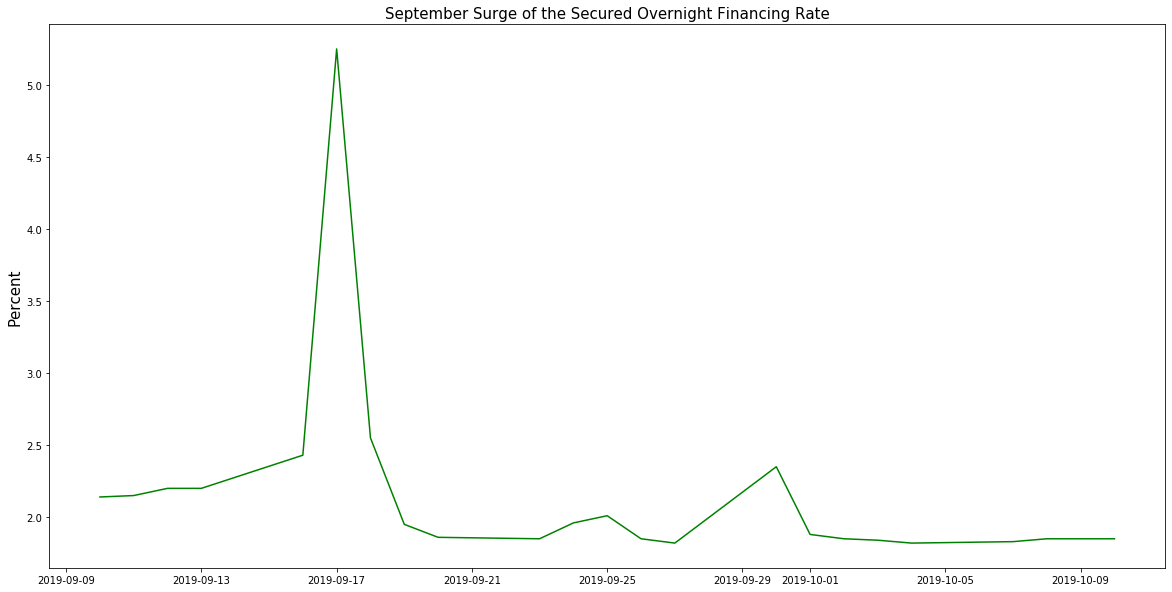

In [16]:
plt.figure(figsize=(20,10)) #width and height of figure respectively
plt.plot(sofr.index, sofr.SOFR, color ='green')  #creating the chars with x as the date which is an index, and the y as the SOFR
plt.title('September Surge of the Secured Overnight Financing Rate', fontsize=15)
plt.ylabel('Percent', fontsize=15)
#plt.axvline(sofr.index[5],color='red') # vertical line on the chart 
#plt.axhline(3.5) # horizontal line on the chart 
plt.show()

In [18]:
volatility = pd.read_excel(r'C:\Users\nuham\Downloads\Python dowloaded files\sofr and libor.xlsx', sheet_name = 'Geometric Mean', na_values = 'n/a')  #reading the date of the SOFR and libor rates and their geometric mean


In [19]:
volatility.head() #exploring



,3-Month Geometric Average of Overnight Treasury Repo Rates,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Date,Tri-Party General Collateral Rate,Broad General Collateral Rate,Secured Overnight Financing Rate,NaN,Series,Description,Units
1,2014-11-20 00:00:00,5,5,6,NaN,Tri-Party General Collateral Rate,Time-series of overnight Treasury Tri-Party ex...,Basis points
2,2014-11-21 00:00:00,5,5,6,NaN,Broad General Collateral Rate,Time-series of overnight Treasury Tri-Party in...,Basis points
3,2014-11-24 00:00:00,5,5,6,NaN,Secured Overnight Financing Rate,Time-series of overnight Treasury Tri-Party in...,Basis points
4,2014-11-25 00:00:00,5,5,6,NaN,NaN,NaN,NaN


In [20]:
volatility_new = volatility.rename(columns={ "3-Month Geometric Average of Overnight Treasury Repo Rates": "DATE", "Unnamed: 1": "Tri-Party_General_Collateral_Rate", "Unnamed: 2": "Broad_General_Collateral_Rate", "Unnamed: 3": "SOFR"})
# change the column names 
volatility_new


,DATE,Tri-Party_General_Collateral_Rate,Broad_General_Collateral_Rate,SOFR,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Date,Tri-Party General Collateral Rate,Broad General Collateral Rate,Secured Overnight Financing Rate,NaN,Series,Description,Units
1,2014-11-20 00:00:00,5,5,6,NaN,Tri-Party General Collateral Rate,Time-series of overnight Treasury Tri-Party ex...,Basis points
2,2014-11-21 00:00:00,5,5,6,NaN,Broad General Collateral Rate,Time-series of overnight Treasury Tri-Party in...,Basis points
3,2014-11-24 00:00:00,5,5,6,NaN,Secured Overnight Financing Rate,Time-series of overnight Treasury Tri-Party in...,Basis points
4,2014-11-25 00:00:00,5,5,6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
722,2017-10-11 00:00:00,102,102,105,NaN,NaN,NaN,NaN
723,2017-10-12 00:00:00,102,102,105,NaN,NaN,NaN,NaN
724,2017-10-13 00:00:00,102,102,105,NaN,NaN,NaN,NaN
725,2017-10-16 00:00:00,102,102,105,NaN,NaN,NaN,NaN


In [21]:
volatility_new2 = volatility_new.drop([0]) #dropped the first row, so now index starts with [1]


In [22]:
volatility_new3 = volatility_new2.reset_index() #need index reframing b/c it starts from the title instead of the first row 


In [23]:
volatility_new3.set_index('DATE', inplace=True, drop=True)   #making the timestamp an index to make it similar to data structure of Libor fred data


In [24]:
volatility_new3.tail() #erase, just for checking purposes

,index,Tri-Party_General_Collateral_Rate,Broad_General_Collateral_Rate,SOFR,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
DATE,,,,,,,,
2017-10-11,722,102,102,105,NaN,NaN,NaN,NaN
2017-10-12,723,102,102,105,NaN,NaN,NaN,NaN
2017-10-13,724,102,102,105,NaN,NaN,NaN,NaN
2017-10-16,725,102,102,105,NaN,NaN,NaN,NaN
2017-10-17,726,102,102,105,NaN,NaN,NaN,NaN


In [49]:

start_date = date(2014,11,20) #aligning date with corresponding SOFR date collected by the https://www.sec.gov/spotlight/fixed-income-advisory-committee/arrc-second-report-041519.pdf
end_date = date(2017,10,17)


In [100]:
Libor = pdr.get_data_fred( 'USD3MTD156N', start_date, end_date) #getting 3-month libor based on U.S. Dollar 

In [101]:
Libor = Libor.rename(columns={'USD3MTD156N': 'LIBOR'})

In [102]:
SOFR_Libor = pd.concat([volatility_new3,Libor], axis = 1) #horizontal stacking of the SOFR and Libor dataframes for plotting purposes

In [103]:
SOFR_Libor['SOFR'].head(20) #checking the SOFR column, seems like numbers should be converted into decimal points to match LIBOR column

DATE
2014-11-20      6
2014-11-21      6
2014-11-24      6
2014-11-25      6
2014-11-26      6
2014-11-27    NaN
2014-11-28      6
2014-12-01      6
2014-12-02      6
2014-12-03      6
2014-12-04      6
2014-12-05      7
2014-12-08      7
2014-12-09      7
2014-12-10      7
2014-12-11      7
2014-12-12      7
2014-12-15      7
2014-12-16      7
2014-12-17      7
Freq: B, Name: SOFR, dtype: object

In [104]:
SOFR_Libor['SOFR'] = SOFR_Libor['SOFR'].astype(float)  #changing the dtype of SOFR column to float so I can divide by 100 and round to 2 dp
SOFR_Libor['SOFR'] = SOFR_Libor['SOFR'].div(100).round(2) #dividing SOFR column by 100, then rounding to 2 decimal points 
SOFR_Libor['SOFR'].head(20) #checking the new SOFR column 

DATE
2014-11-20    0.06
2014-11-21    0.06
2014-11-24    0.06
2014-11-25    0.06
2014-11-26    0.06
2014-11-27     NaN
2014-11-28    0.06
2014-12-01    0.06
2014-12-02    0.06
2014-12-03    0.06
2014-12-04    0.06
2014-12-05    0.07
2014-12-08    0.07
2014-12-09    0.07
2014-12-10    0.07
2014-12-11    0.07
2014-12-12    0.07
2014-12-15    0.07
2014-12-16    0.07
2014-12-17    0.07
Freq: B, Name: SOFR, dtype: float64

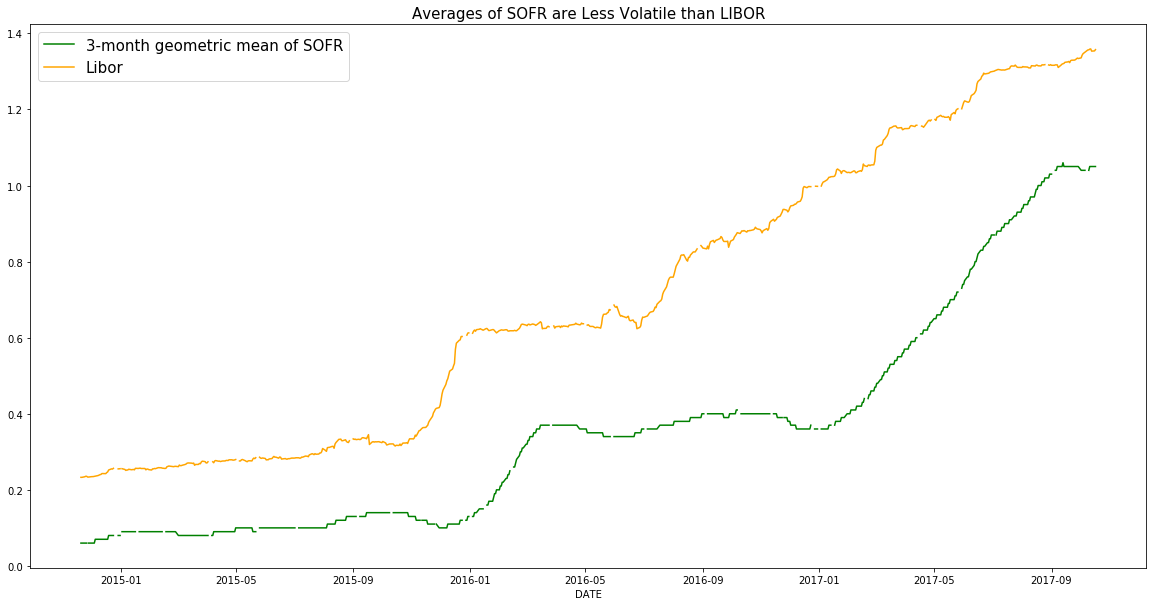

In [138]:
plt.figure(figsize=(20,10)) #plt. is best for more flexible editing of individual features 
plt.plot(SOFR_Libor.index, SOFR_Libor['SOFR'], label='3-month geometric mean of SOFR', color = 'green')
plt.plot(SOFR_Libor.index, SOFR_Libor['LIBOR'], label='Libor', color = 'orange')
plt.xlabel('DATE')
plt.title('Averages of SOFR are Less Volatile than LIBOR', fontsize = 15)
plt.legend(loc='best', fontsize=15) 
plt.show()